# **NVIDIA** Stock Price Prediction from 2019 to present

In [50]:
# Import the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [51]:
nvda = yf.Ticker("NVDA")
nvidia = nvda.history(start='2019-01-01', end='2024-07-24')

In [52]:
nvidia

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-05:00,3.240214,3.434666,3.225580,3.378612,508752000,0.0,0.0
2019-01-03 00:00:00-05:00,3.318341,3.352321,3.167045,3.174486,705552000,0.0,0.0
2019-01-04 00:00:00-05:00,3.247654,3.416064,3.216899,3.377868,585620000,0.0,0.0
2019-01-07 00:00:00-05:00,3.435162,3.593651,3.383820,3.556695,709160000,0.0,0.0
2019-01-08 00:00:00-05:00,3.638295,3.640527,3.395477,3.468149,786016000,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-17 00:00:00-04:00,121.349998,121.849998,116.720001,117.989998,390086200,0.0,0.0
2024-07-18 00:00:00-04:00,121.849998,122.400002,116.559998,121.089996,320979500,0.0,0.0
2024-07-19 00:00:00-04:00,120.349998,121.599998,117.370003,117.930000,217223800,0.0,0.0


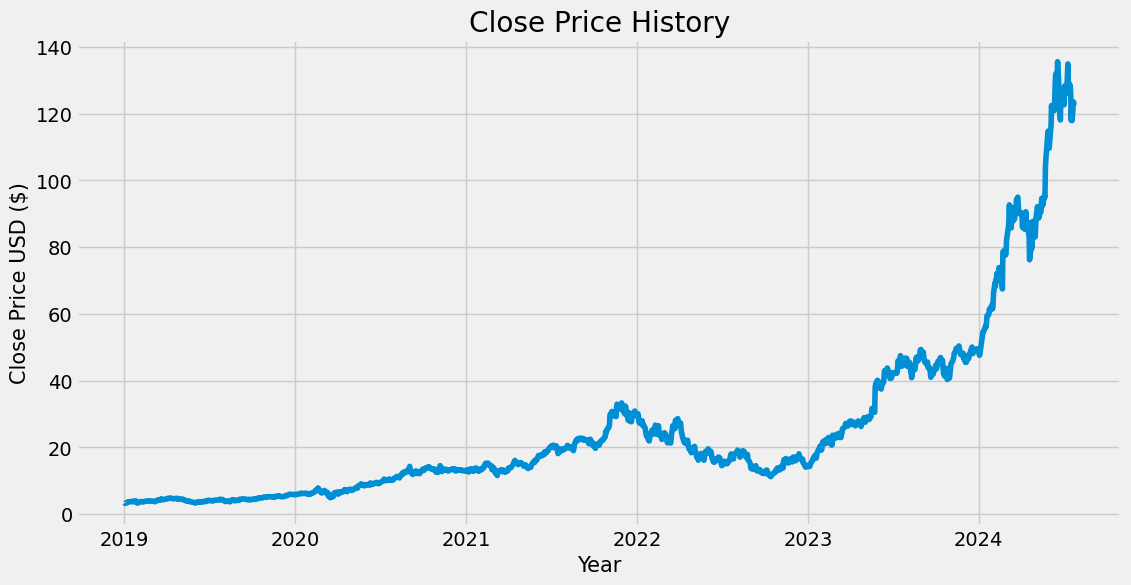

In [53]:
# Visualize the closing price history
plt.figure(figsize=(12,6))
plt.title('Close Price History')
plt.plot(nvidia['Close'])
plt.xlabel('Year',fontsize=15)
plt.ylabel('Close Price USD ($)',fontsize=15)
plt.show()

In [54]:
# Create a new dataframe with only the Close column
close = nvidia.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = close.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

1119

In [55]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00154167],
       [0.        ],
       [0.00153605],
       ...,
       [0.86669738],
       [0.90906723],
       [0.90189226]])

In [56]:
# Create the training data set

# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00154167, 0.        , 0.00153605, 0.00288665, 0.00221791,
       0.00273304, 0.00322945, 0.00390382, 0.00420541, 0.00409863,
       0.00390568, 0.00444517, 0.00542113, 0.00389257, 0.00398998,
       0.00559159, 0.0060243 , 0.00187697, 0.00067623, 0.00176084,
       0.00295221, 0.00313579, 0.00396938, 0.00411362, 0.00468495,
       0.00363968, 0.00378018, 0.00345799, 0.00434215, 0.00466247,
       0.00497155, 0.00549793, 0.00536681, 0.00572459, 0.00520384,
       0.00584448, 0.00575082, 0.00545298, 0.0051364 , 0.00495076,
       0.00536142, 0.0054233 , 0.00537455, 0.00453635, 0.00401318,
       0.00427195, 0.00624087, 0.00649964, 0.00764349, 0.00706969,
       0.00786664, 0.00770536, 0.00897298, 0.00872734, 0.01051624,
       0.00930863, 0.00861108, 0.00919049, 0.00912112, 0.00926175])]
[0.009694912847810305]

[array([0.00154167, 0.        , 0.00153605, 0.00288665, 0.00221791,
       0.00273304, 0.00322945, 0.00390382, 0.00420541, 0.00409863,
       0.00390568, 0.00444517, 0.0

In [57]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [58]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1059, 60, 1)

In [59]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [60]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [61]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1059/1059 [==============================] - 22s 18ms/step - loss: 2.9328e-04


In [62]:
# Create the testing data set
# Create a new array containing scaled values from index 1059 to 1398
test_data = scaled_data[training_data_len - 60:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [63]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [64]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [65]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

9/9 [==============================] - 1s 11ms/step


In [66]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4.362416243467707

<ipython-input-67-601601ddcdde>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


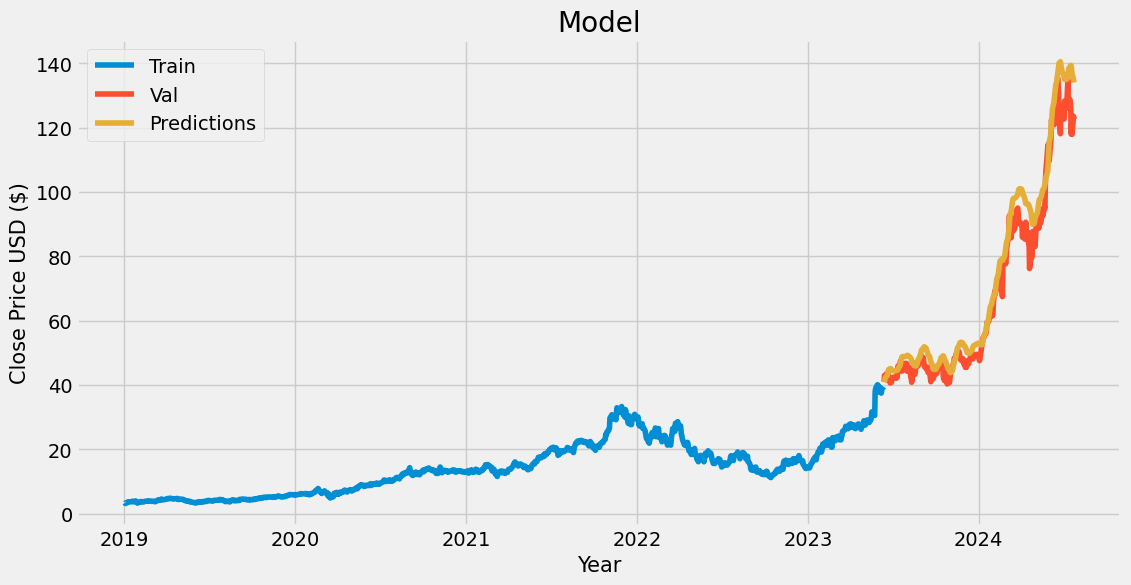

In [67]:
# Plot the data
train = nvidia[:training_data_len]
valid = nvidia[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(12, 6))
plt.title('Model')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Close Price USD ($)', fontsize=15)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')
plt.show()

In [68]:
# Show the valid and predicted prices
valid[['Close', 'Predictions']]

,Close,Predictions
Date,,
2023-06-13 00:00:00-04:00,41.009724,40.899757
2023-06-14 00:00:00-04:00,42.984131,41.178795
2023-06-15 00:00:00-04:00,42.640236,41.730804
2023-06-16 00:00:00-04:00,42.679222,42.369358
2023-06-20 00:00:00-04:00,43.794884,43.012657
...,...,...
2024-07-17 00:00:00-04:00,117.989998,139.260895
2024-07-18 00:00:00-04:00,121.089996,138.077530
2024-07-19 00:00:00-04:00,117.930000,136.741043


In [69]:
# Get the quote
nvda1 = yf.Ticker('NVDA')
nvidia1 = nvda1.history(start='2019-01-01', end='2024-07-24')
#Create a new dataframe
nvidia_df = nvidia1.filter(['Close'])
# Get the last 60 day closing price and convert the dataframe to an array
last_60_days = nvidia_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 19ms/step
[[133.24213]]


In [70]:
# Get the quote
nvda2 = yf.Ticker('NVDA')
nvidia2 = nvda2.history(start='2024-07-24', end='2024-07-24')
print(nvidia2['Close'])

Date
2024-07-23 00:00:00-04:00    122.589996
Name: Close, dtype: float64


### There is only a **~6 USD ($)** difference between the predicted price and the original price.
### Therefore it is a good model.